In [2]:
%matplotlib inline

2. Test with PSPNet Pre-trained Models
======================================

This is a quick demo of using GluonCV PSPNet model on ADE20K dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.


In [3]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



In [4]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)

100%|███████████████████████████████████| 52/52 [00:00<00:00, 8667.29KB/s]


'ade20k_example.jpg'

load the image



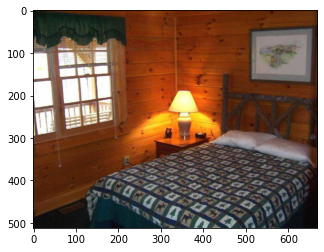

In [28]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [27]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [11]:
model = gluoncv.model_zoo.get_model('deeplab_resnest101_ade', pretrained=True)

189137KB [04:04, 773.49KB/s]                                              


100%|████████████████████████████| 253661/253661 [05:27<00:00, 773.87KB/s]


make prediction using single scale



In [29]:
import time
start = time.time()
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
print(time.time() - start)

ValueError: not enough values to unpack (expected 2, got 1)

Add color pallete for visualization



In [13]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

show the predicted mask



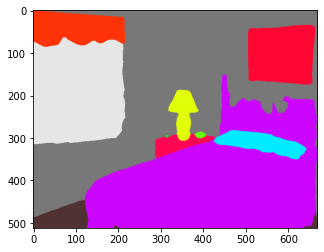

In [14]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()